<a href="https://colab.research.google.com/github/Magnusrm/TDAT3025-Machine-Learning/blob/master/Task1.2/oppg_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W = [[-16.683527]], b = [[8.138975]], loss = [[0.00029189]
 [0.00019458]]
loss: 6.151620093987922e-08


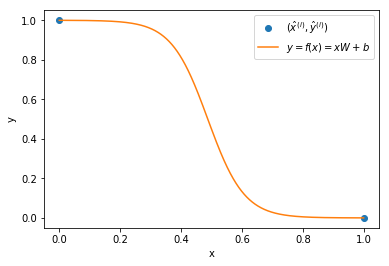

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np


from math import e
from matplotlib import pyplot as plt



x_train = np.mat([[0], [1]])
y_train = np.mat([[1], [0]])

class SigmoidModel:
    def __init__(self):

        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)

        self.W = tf.Variable([[0.0]])
        self.b = tf.Variable([[0.0]])

        self.logits = tf.matmul(self.x, self.W) + self.b

        self.loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=self.y, logits=self.logits)
        
model = SigmoidModel()

minimize_operation = tf.train.GradientDescentOptimizer(10).minimize(model.loss)

session = tf.Session()

session.run(tf.global_variables_initializer())

for epoch in range(1000):
    session.run(minimize_operation, {model.x: x_train, model.y: y_train})

# Evaluate training accuracy
W, b, loss = session.run([model.W, model.b, model.loss], {model.x: x_train, model.y: y_train})
print("W = %s, b = %s, loss = %s" % (W, b, loss))

session.close()



fig, ax = plt.subplots()

ax.plot(x_train, y_train, 'o', label='$(\\hat x^{(i)},\\hat y^{(i)})$')
ax.set_xlabel('x')
ax.set_ylabel('y')

class NonLinearRegressionModel:
    def __init__(self, W, b):
        self.W = W
        self.b = b

    # Predictor
    def f(self, x):
        #print("f:result: " + self.sigmoid(np.matmul(x, self.W) + self.b))
        return self.sigmoid(np.matmul(x, self.W) + self.b)
        #return x * self.W + self.b

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Mean Squared Error
    def loss(self, x, y):
        return np.mean(np.square(self.f(x) - y))


model = NonLinearRegressionModel(np.mat(W), np.mat(b))
x = np.expand_dims(np.arange(np.min(x_train), np.max(x_train), 0.0001), 1)
#print(x)
#x = np.mat([[np.min(x_train)], [np.max(x_train)]])
#print("Y: %s" % (model.f(x)))
ax.plot(x, model.f(x), label='$y = f(x) = xW+b$')

print('loss:', model.loss(x_train, y_train))

ax.legend()
plt.show()
